In [22]:
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Regional_YearLevel Dataset_Lebanon.csv')

In [24]:
print(df.columns.to_list())

['year', 'dist_leb', 'hh_size_avg', 'no_children_avg', 'no_over_fifteen_avg', 'work_income_avg', 'humanitarian_assistance_income_avg', 'eviction_notice', 'actual_eviction', 'socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare', 'socio_econ_medicine', 'socio_econ_med_availability', 'socio_econ_loss_job', 'socio_econ_famsupport', 'socio_econ_mentalhealth', 'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict', 'socio_econ_lowerqual_shelter', 'socio_econ_abandoned', 'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third', 'socio_econ_baby', 'socio_econ_travel_homeclimate', 'socio_econ_none', 'socio_econ_dk01', 'socio_econ_noreply', 'current_debt_avg', 'unabletravel', 'children_symptoms_sadness', 'children_symptoms_withdrawal', 'children_symptoms_selfharm', 'children_symptoms_suicidal', 'children_symptoms_low_interest', 'children_symptoms_no_symptoms', 'children_symptoms_dk', 'children_symptoms_noreply', 'child_has_to_work', 'school_too_far', 

In [25]:
df['dist_leb'].unique()

array(['Akkar', 'Aley', 'Baabda', 'Baalbek', 'Bcharre', 'Beirut',
       'Bent Jbeil', 'Chouf', 'Don’t know', 'El Batroun', 'El Hermel',
       'El Koura', 'El Meten', 'El Minieh-Dennie', 'El Nabatieh',
       'Hasbaya', 'Jbeil', 'Jezzine', 'Kesrwane', 'Marjaayoun', 'Rachaya',
       'Saida', 'Sour', 'Tripoli', 'West Bekaa', 'Zahle', 'Zgharta'],
      dtype=object)

In [10]:
df['school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct'] = 100*df['school_Yes – I have a child who was attending school but who stopped in the last 30 days_pct'] 

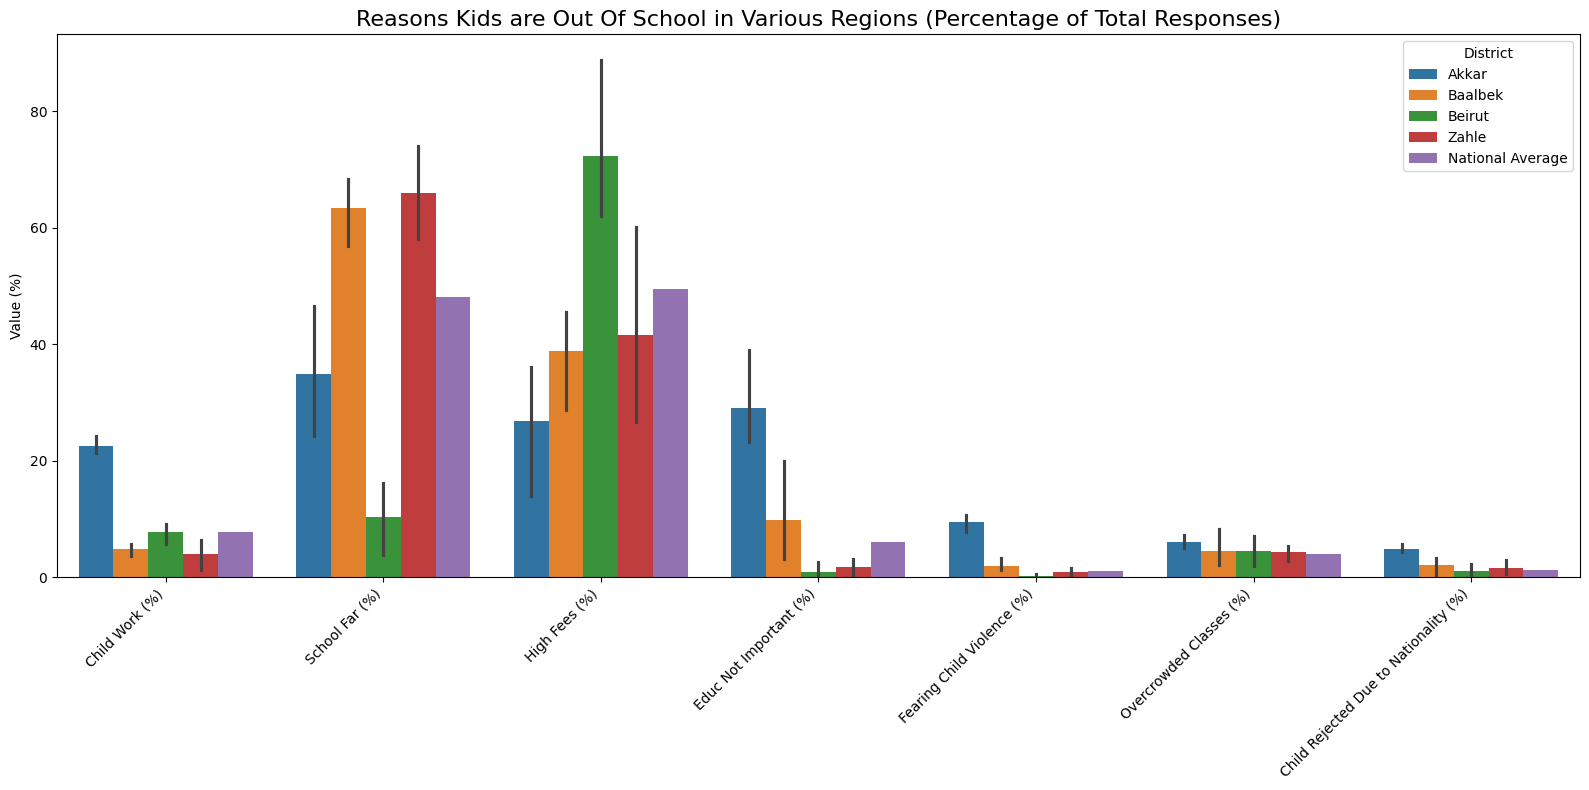

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# List of indicators
indicators = [
    'child_has_to_work_pct',
    'school_too_far_pct',
    'school_fees_high_pct',
    'education_not_important_pct',
    'fear_violence_pct',
    'overcrowded_classes_pct',
    'rejected_due_to_nationality_pct'
]

# Filter only Akkar, Zahle
df_filtered = df[df['dist_leb'].isin(['Akkar', 'Zahle', 'Baalbek', 'Beirut'])]

# Create a national average
national_avg = df[indicators].mean().to_frame().T
national_avg['dist_leb'] = 'National Average'

# Combine the filtered df and national average
plot_df = pd.concat([df_filtered[['dist_leb'] + indicators], national_avg], ignore_index=True)

# Melt for easier plotting
plot_df_melted = plot_df.melt(id_vars="dist_leb", value_vars=indicators, var_name="Indicator", value_name="Value")
indicator_mapping = {
    'child_has_to_work_pct': 'Child Work (%)',
    'school_too_far_pct': 'School Far (%)',
    'school_fees_high_pct': 'High Fees (%)',
    'education_not_important_pct': 'Educ Not Important (%)',
    'child_married_pct': 'Child is Married (%)',
    'fear_violence_pct': 'Fearing Child Violence (%)',
    'overcrowded_classes_pct': 'Overcrowded Classes (%)',
    'rejected_due_to_nationality_pct': 'Child Rejected Due to Nationality (%)'
}
plot_df_melted["Indicator"] = plot_df_melted["Indicator"].replace(indicator_mapping)


# Plot
plt.figure(figsize=(16, 8))  # wider and taller
sns.barplot(data=plot_df_melted, x="Indicator", y="Value", hue="dist_leb")
plt.xticks(rotation=45, ha="right")
plt.title("Reasons Kids are Out Of School in Various Regions (Percentage of Total Responses)", fontsize = 16)
plt.ylabel("Value (%)")
plt.xlabel("")
plt.legend(title="District")
plt.tight_layout()
plt.savefig('RegionalComparison.jpeg')
plt.show()

In [25]:
columns_del = ['socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare', 'socio_econ_medicine', 'socio_econ_med_availability', 'socio_econ_loss_job', 'socio_econ_famsupport', 'socio_econ_mentalhealth', 'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict', 'socio_econ_lowerqual_shelter', 'socio_econ_abandoned', 'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third', 'socio_econ_baby', 'socio_econ_travel_homeclimate', 'socio_econ_none', 'socio_econ_dk01', 'socio_econ_noreply', 'tensions_incidents_verbal_harass', 'tensions_incidents_phys_harass', 'tensions_incidents_robbery', 'tensions_incidents_women_harass', 'tensions_incidents_subsidized', 'tensions_incidents_shop_atm', 'tensions_incidents_socmedia', 'tensions_incidents_medarticle', 'tensions_incidents_armedviol', 'tensions_incidents_physviolence', 'tensions_incidents_politstatem', 'tensions_incidents_protest', 'tensions_incidents_disputes', 'tensions_incidents_eviction', 'tensions_incidents_movement', 'tensions_incidents_threat', 'tensions_incidents_discrim']
df = df.drop(columns=[col for col in columns_del])

In [26]:
df = df[df['dist_leb'] != "Don’t know"]

In [27]:
coords_map = {
    "Akkar": (34.5459, 36.0758),
    "Aley": (33.8083, 35.5975),
    "Baabda": (33.8338, 35.5441),
    "Baalbek": (34.0058, 36.2181),
    "Bcharre": (34.2500, 35.9833),
    "Beirut": (33.8886, 35.4955),
    "Bent Jbeil": (33.1167, 35.4167),
    "Chouf": (33.7000, 35.6000),
    "El Batroun": (34.2500, 35.6500),
    "El Hermel": (34.3833, 36.3833),
    "El Koura": (34.3333, 35.8333),
    "El Meten": (33.9000, 35.5833),
    "El Minieh-Dennie": (34.5000, 35.9500),
    "El Nabatieh": (33.3833, 35.4833),
    "Hasbaya": (33.4000, 35.7000),
    "Jbeil": (34.1230, 35.6519),
    "Jezzine": (33.5417, 35.5833),
    "Kesrwane": (33.9800, 35.6500),
    "Marjaayoun": (33.3667, 35.6000),
    "Rachaya": (33.5000, 35.8500),
    "Saida": (33.5600, 35.3750),
    "Sour": (33.2719, 35.2035),
    "Tripoli": (34.4333, 35.8333),
    "West Bekaa": (33.6000, 35.7000),
    "Zahle": (33.8500, 35.9000),
    "Zgharta": (34.4000, 35.9000),
}


In [28]:
df["lat"] = df["dist_leb"].map(lambda x: coords_map.get(x, (None, None))[0])
df["lon"] = df["dist_leb"].map(lambda x: coords_map.get(x, (None, None))[1])

In [79]:
df_2024 = df[df['year'] == 2024]

In [82]:
from sklearn.impute import SimpleImputer

numeric_columns = df_2024.select_dtypes(include=["float64", "int64"]).columns

# Add lat and lon to the list of columns to include
numeric_columns = list(numeric_columns) + ["lat", "lon"]

# Create a new dataframe with only the relevant columns
X = df_2024[numeric_columns]

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Run DBSCAN or any other clustering algorithm (DBSCAN is density-based, good for irregular clusters)
db = DBSCAN(eps=0.1, min_samples=5)
df_2024["cluster"] = db.fit_predict(X_scaled)

# Check the results by grouping by the cluster label
cluster_summary = df_2024.groupby("cluster").mean(numeric_only=True)

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_66753/1878960278.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024["cluster"] = db.fit_predict(X_scaled)


In [83]:
unique_labels = np.unique(df_2024["cluster"])

# Exclude the noise points, which are labeled as -1
num_clusters = len(unique_labels[unique_labels != -1])

print(f"Number of clusters (excluding noise): {num_clusters}")

Number of clusters (excluding noise): 0


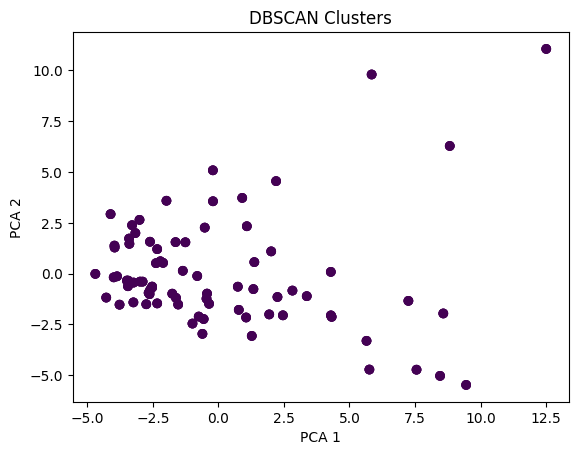

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D if necessary for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters')
plt.show()

In [51]:
# Calculate density as points per cluster for each label
density = df.groupby('cluster').size()

print(density)

cluster
-1    234
dtype: int64


In [52]:
db = DBSCAN(eps=0.05, min_samples=5)  # Adjust eps and min_samples based on the density of your data
df["cluster"] = db.fit_predict(X_scaled)

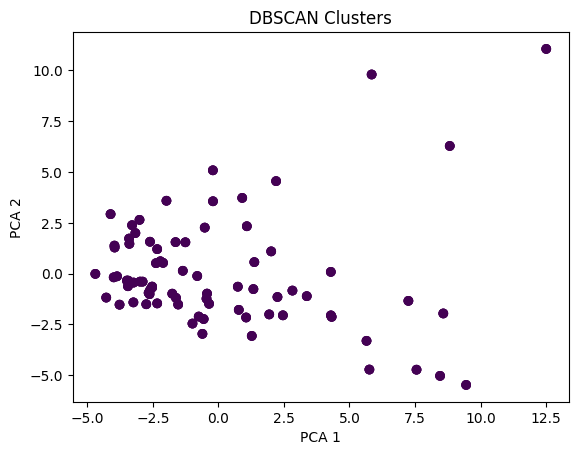

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D if necessary for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters')
plt.show()

In [54]:
# Count the number of noise points (label -1)
noise_points = (df["cluster"] == -1).sum()
print(f"Number of noise points: {noise_points}")

Number of noise points: 234


In [55]:
from sklearn.cluster import KMeans

# Try KMeans clustering with a specified number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

In [61]:
df["cluster_kmeans"].unique()

array([4, 1, 0, 2, 3], dtype=int32)

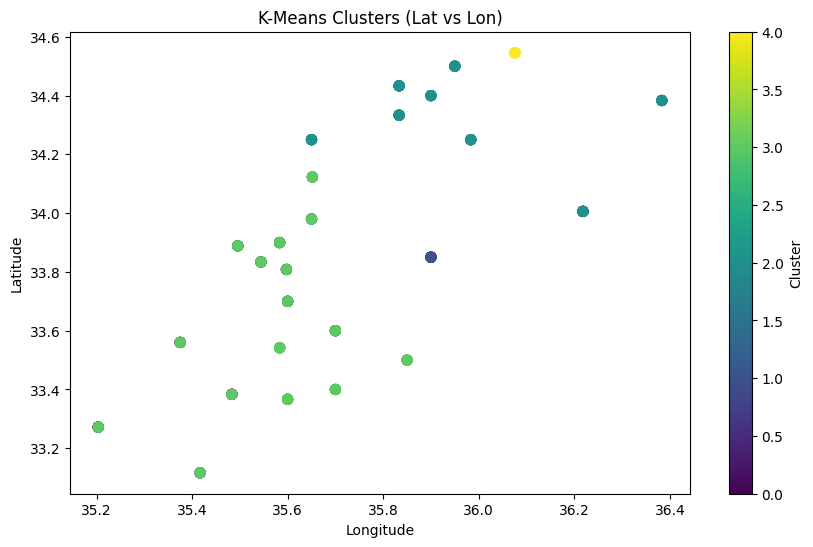

In [62]:
import matplotlib.pyplot as plt

# Scatter plot for latitude and longitude with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], c=df['cluster_kmeans'], cmap='viridis', s=50)
plt.title('K-Means Clusters (Lat vs Lon)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [63]:
centroids = kmeans.cluster_centers_

print("Cluster Centroids (Lat, Lon, Other features):")
print(centroids)

Cluster Centroids (Lat, Lon, Other features):
[[-5.56702214e-01 -4.59342715e-02  1.87416092e-01 -5.03636601e-01
  -1.76241901e-02  3.23635387e-01  0.00000000e+00  0.00000000e+00
   6.87258903e-01  0.00000000e+00 -3.20094737e-01 -8.81584450e-02
   2.62057339e-01  1.59634638e-01  1.02978018e-02  2.06303833e+00
   5.50290843e-02  3.55754764e-03  1.00079842e+00  2.02875835e+00
   1.09987785e+00  7.41789538e-01 -1.06940309e-02  4.80417864e-02
   1.18232119e-01  1.05670357e+00  7.84867634e-01  4.08259360e-01
   7.36160229e-01  1.00938251e+00  9.93575906e-01  1.90323025e+00
   0.00000000e+00 -3.59294586e-01 -3.06665068e-01 -4.85445208e-01
   1.85876865e+00  2.97138458e-01  2.00142902e+00 -9.25304781e-03
   5.22724746e-01 -6.39556470e-01 -1.03298021e-01 -1.96078576e-01
  -1.67693712e-01 -3.38681068e-01  5.44749164e-01 -2.67940929e-01
  -3.13009707e-01 -2.97068257e-01  0.00000000e+00  0.00000000e+00
   5.23659351e-01  4.93402040e-01  0.00000000e+00 -4.85445208e-01
   1.99223502e+00 -1.61498354e

In [68]:
# Descriptive statistics for each cluster
cluster_stats = df.groupby('cluster_kmeans').describe()
cluster_stats.to_csv('kmeans_clustering.csv', index = False)

In [75]:
from sklearn.impute import SimpleImputer

# Impute missing values (e.g., using the mean of each column)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_features]), columns=numerical_features)

# Apply scaling and PCA after imputation
scaled_data = scaler.fit_transform(df_imputed)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca['cluster_kmeans'] = df['cluster_kmeans']

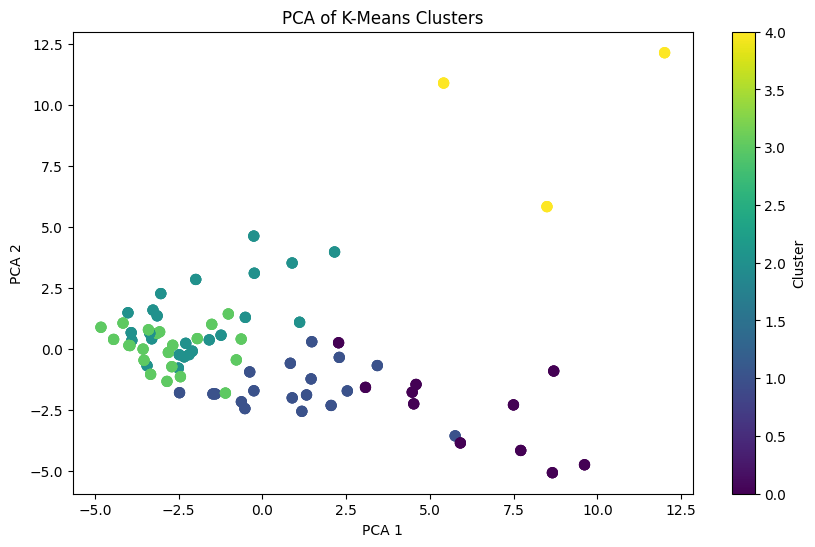

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster_kmeans'], cmap='viridis', s=50)
plt.title('PCA of K-Means Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [78]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio (PCA1, PCA2):", explained_variance)

Explained variance ratio (PCA1, PCA2): [0.25176616 0.12200097]
